Implementation of the Stable Matching Algorithm as described in Lectures 1 and 2 of
"Stable Marriage and Its Relation to Other Combinatorial Problems : An Introduction to the Mathematical Analysis of Algorithms" by Donald E. Knuth and Martin Goldstein

Produced using Python 3.9.7, Numpy version 1.21.2


In [3]:
#Task 1(a)
def numOnes(x:int) -> int:
    '''Takes a positive integer x, returns number of ones in binary representation of the input integer x'''
    numOnes = 0
    while x!=0:
        if x%2 == 0:
            x = x//2
        else:
            numOnes += 1
            x = (x - 1)//2
    return numOnes


In [4]:
#Task 1(b)
def binRep(x:int) -> list:
    '''Takes a positive integer x, Returns binary representation of input integer x as a list, and isomorphically shows positions of 1s'''
    rep = []
    while x!=0:
        if x%2 == 0:
            rep = [0] + rep
            x = x//2
        else:
            rep = [1] + rep
            x = (x - 1)//2
    return rep


In [17]:
#Task 1(c)
import math
def numPossibleTeams(x:int) -> int:
    '''Given even integer x, returns number of ways to split x unique entities into two equal sized teams, ignoring equivalents
    For example, assigning A,B,C to Team 1 and D,E,F to Team 2 is no different to assigning the same players to the opposite team'''
    return math.comb(x,x//2)//2

In [24]:
#Task 1(d)
def allCombs(n:int, nOnes:int) -> list:
    '''Given a total length n, and nOnes number of 1s, produce a list of all arrangements of nOnes 1s and (n - nOnes) 0s.'''
    combs = []
    #base cases
    if n == 0:
        return []
    if n == nOnes:
        for i in range(n):
            combs.append(1)
        return [combs]
    if nOnes == 0:
        for i in range(n):
            combs.append(0)
        return [combs]
    if n == 2 and nOnes == 1:
        return [[0,1],[1,0]]
    
    #recursively find subpermutations for the combinations beginning with 0 and 1
    subperms0 = allCombs(n - 1, nOnes)
    subperms1 = allCombs(n - 1, nOnes - 1)
    
    #create all permutations
    for perm in subperms0:
        combs.append([0] + perm)
    for perm in subperms1:
        combs.append([1] + perm)
    return combs

def allAssignments(n:int) -> list:
    '''Given EVEN integer n, return a list of all arrangements (as lists) of n/2 0s and n/2 1s, WITHOUT their opposites 
    (only giving those beginning with 0). For example, if [0,1,0,1] is in the list, [1,0,1,0] will not be'''
    #base cases
    if n == 0:
        return []
    if n == 2:
        return [[0,1]]
    
    #produce all possible assignments
    combs = []
    subperms = allCombs(n - 1, n//2)
    for perm in subperms:
        combs.append([0] + perm)
    return combs
    
def genAllTeams(x:list) -> list:
    '''Given an EVEN length list x of UNIQUE identifiers (neither enforced), give the list of tuples of all possible 
    equally sized teams'''
    n = len(x)
    #find the abstract representation of all possible assignments as 0s and 1s
    teamForms = allAssignments(n)
    teams = []
    
    #for each abstract representation, create that actual team
    for form in teamForms:
        team1 = []
        team2 = []
        
        for i in range(n):
            if form[i] == 0:
                team1.append(x[i])
            else:
                team2.append(x[i])
        
        teams.append((team1,team2))
    return teams

#check number of teams generated is correct
import numpy as np
n = 24
players = list(range(n))
for i in np.array(range(1,n//2))*2:
    subList = players[:i]
    print(len(genAllTeams(subList))==numPossibleTeams(i))

True
True
True
True
True
True
True
True
True
True
True


Task 2(a)
A preference table, mathematically, can be considered a structure that takes an input from a finite set of possible inputs (say, A,B,...,E) and returns an output of an ordered(!) list of preferences. We need not be able to infer the person from their preferences. Indeed, two individuals could have the same preferences, this need not be an injection. Due to this, I would suggest a dictionary whose values are lists would be a suitable data structure.

Task 2(b)
A matching can be considered a bijection between the set of Men and the set of Women. As such, inferring one from the other and vice versa may be useful, so a dictionary may not be suitable here. We also wish to change the matchings as we move through an algorithm that swaps pairings (changing Aa to Ab for example), so unchangeable structures such as tuples may not be suitable either. This leaves a list of length 2 lists as a potential option. However, this may be cumbersome to deal with. A 2D 2 x n matrix whose first row contains the men and the second row contains the matched women.

In [27]:
#Task 3
import random
def randomPrefTable(list1:list, list2:list) -> tuple:
    '''Takes two lists of equal length and unique items, returns a tuple of two dictionaries representing preference tables'''
    n = len(list1)
    pref1 = {}
    pref2 = {}
    for i in range(n):
        pref1[list1[i]] = random.sample(list2,n)
        pref2[list2[i]] = random.sample(list1,n)
    return pref1,pref2

randomPrefTable([1,2,3],[4,5,6])

({1: [4, 5, 6], 2: [4, 6, 5], 3: [4, 6, 5]},
 {4: [3, 1, 2], 5: [3, 1, 2], 6: [2, 1, 3]})

In [34]:
#Task 4
def isValidPrefTables(pref1:dict, pref2:dict) -> bool:
    '''Takes two preference tables, returns true only if they are valid'''
    list1 = pref1.keys()
    list2 = pref2.keys()
    n = len(list1)
    
    #if lengths don't match, return false
    if n!=len(list2):
        return False
    
    #for each row of the preference tables, if it is the wrong length or is missing a value from the key list, return false
    for listi in pref1.values():
        if len(listi) != n:
            return False
        for j in list2:
            if j not in listi:
                return False
    
    for listi in pref2.values():
        if len(listi) != n:
            return False
        for j in list1:
            if j not in listi:
                return False 
            
    #return true if all above tests are passed
    return True

#Check an example from the lecture is valid
a,b,c,d,e,A,B,C,D,E = "a","b","c","d","e","A","B","C","D","E"
menPref = {A:[c,b,d,a],
          B:[b,a,c,d],
          C:[b,d,a,c],
          D:[c,a,d,b]
          }
womenPref = {a:[A,B,D,C],
            b:[C,A,D,B],
            c:[C,B,D,A],
            d:[B,A,C,D]}

isValidPrefTables(menPref, womenPref)

#Check random preference tables of length up to maxSize are valid, numReps times each (few seconds to run)
random.seed(5)
maxSize = 50
numReps = 100
error = False
for i in range(2,maxSize):
    men = list(range(i))
    women = [man + i for man in men]
    for j in range(numReps):
        pref1,pref2 = randomPrefTable(men,women)
        if not isValidPrefTables(pref1,pref2):
            print("Invalid preference table of length " + str(i) + " produced")
            error = True
if not error:
    print("All clear!")

All clear!


In [36]:
#Task 5
def findPartner(entry, matching:list):
    '''Takes an entry of arbitrary type, and returns its associated partner in the first row of a matching. 
    Prints error and returns False if not found'''
    n = len(matching[0])
    for i in range(n):
        if matching[1][i]==entry:
            return matching[0][i]
    print("Entry not found in second row")
    return False
        
def isStable(pref1:dict, pref2:dict, matching:list, display:bool=False) -> bool:
    '''Takes both preference tables, a suggested matching, and a boolean on whether to print the mutually preferable pair
    (default False). Returns True if it is stable, False if it is not, None if invalid preference tables'''
    if not isValidPrefTables(pref1,pref2):
        print("Invalid Preference Tables")
        return None
    
    list1 = pref1.keys()
    list2 = pref2.keys()
    n = len(matching[0])
    
    for i in range(n):
        #find the ith man (in matching order) and his current partner
        currentMan = matching[0][i]
        currentWoman = matching[1][i]
        
        #find all women that man prefers
        manPrefs = pref1[currentMan]
        index = 0
        for j in range(n):
            if manPrefs[j] == currentWoman:
                index = j
                break
        manPrefs = manPrefs[:index]
        
        #for each woman the man prefers, check if she prefers him to her current partner
        for woman in manPrefs:
            womanPartner = findPartner(woman, matching)
            womanPrefs = pref2[woman]
            indexW = 0
            for j in range(n):
                if womanPrefs[j] == womanPartner:
                    indexW = j
                    break
            womanPrefs = womanPrefs[:indexW]
            #if the ith man prefers a woman who mutually prefers him, return false
            if currentMan in womanPrefs:
                if display:
                    print(str(currentMan)," mutually prefers ", str(woman))
                return False
    
    #if no conflict is found, return true
    return True

#Test from Example 1
matching = [[A,B,C,D],[a,b,c,d]]
isStable(menPref,womenPref, [[A,B,C,D],[a,b,c,d]], True)

#Test from Example 3
menPref = {A: [a,b,c,d,e],
          B: [b,c,d,e,a],
          C: [c,d,e,a,b],
          D: [d,e,a,b,c],
          E: [e,a,b,c,d]}

womenPref = {a: [B,C,D,E,A],
            b: [C,D,E,A,B],
            c: [D,E,A,B,C],
            d: [E,A,B,C,D],
            e: [A,B,C,D,E]}

men = [A,B,C,D,E]
women = [a,b,c,d,e]
for i in range(5):
    matching[0] = men
    matching[1] = women[i:] + women[:i]
    print(isStable(menPref,womenPref,matching))

True
True
True
True
True


In [79]:
def oneWayScore(pref:dict, key, value) -> int:
    '''Takes a preference table, a key for the table, and a value to score. Returns the score as position in list
    (lower is better)'''
    ranking = pref[key]
    n = len(ranking)
    for i in range(n):
        if ranking[i] == value:
            return i
            
def matchingScores(pref1:dict, pref2:dict, matching:list) -> tuple:
    '''Takes two preference tables and a matching, returns a tuple of scores for the men and women'''
    menScore = 0
    womenScore = 0
    n = len(matching[0])
    for i in range(n):
        man = matching[0][i]
        woman = matching[1][i]
        menScore += oneWayScore(pref1, man, woman)
        womenScore += oneWayScore(pref2, woman, man)
    return menScore,womenScore

Task 7(a)
Omega can be any discrete value (due to use of equality comparisons, floats etc should be avoided) not originally found in the list of men, that is then appended to the end of each woman's preference list. Omega could simply be stored as an integer. If all men are not integers, Omega can be some fixed value. If some men are integers, Omega can be set to the largest of those integers, plus 1. 

In [37]:
#Task 7(b)
def createOmega(men: list) -> int:
    '''Given a list, returns an integer not in that list'''
    menMax = 0
    for m in men:
        if type(m) == int and m > menMax:
            menMax = m
    return menMax + 1

def stableMatching(pref1:dict, pref2:dict):
    '''Given two preference tables, produce a stable matching'''
    n = len(pref1.keys())
    omega = createOmega(pref1.keys())
    #match all women to least desirable man omega
    matching = [[omega]*n, list(pref2.keys())]
    
    #add omega to end of womens preferences
    for w in pref2.keys():
        pref2[w].append(omega)
        
    k = 0
    while k < n:
        #X <- the k+1th man
        X = list(pref1.keys())[k]
        
        while X != omega:
            #x <- X's best remaining preference
            x = pref1[X][0]
            
            #find if x prefers X to her current partner
            xPrefersX = None
            xList = pref2[x]
            xPartner = findPartner(x,matching)
            for i in range(len(xList)):
                if xList[i] == xPartner:
                    xPrefersX = False
                    break
                if xList[i] == X:
                    xPrefersX = True
                    break
                    
            #if x prefers X, engage the two via the matching, and seek to update the pairing for x's previous partner
            if xPrefersX:
                for i in range(n):
                    if matching[1][i]==x:
                        matching[0][i] = X
                X = xPartner
            
            #if the remaining unpartnered man is not omega, remove his favourite from his preference list, as she is incompatible
            if X != omega:
                for i in range(len(pref1[X])):
                    if pref1[X][i] == x:
                        pref1[X] = pref1[X][:i] + pref1[X][(i+1):]
                        break
        k += 1
    return matching

In [39]:
print(stableMatching(menPref,womenPref)) #Hooray!

menPref = {A:[c,b,d,a],
          B:[b,a,c,d],
          C:[b,d,a,c],
          D:[c,a,d,b]
          }
womenPref = {a:[A,B,D,C],
            b:[C,A,D,B],
            c:[C,B,D,A],
            d:[B,A,C,D]}

print(stableMatching(menPref,womenPref)) #Hooray

[['A', 'B', 'C', 'D', 'E'], ['a', 'b', 'c', 'd', 'e']]
[['B', 'C', 'D', 'A'], ['a', 'b', 'c', 'd']]


In [44]:
import copy
maxN = 100 #maximum number of men/women
m = 50 #repetitions for each n

for n in range(maxN):
    #unique men and women
    men = list(range(n))
    women = [man + n for man in men] 

    #for each sample, produce, solve, and score random problem
    for j in range(m):
        pref1,pref2 = randomPrefTable(men,women)
        #stableMatching changes pref1, pref2 so this is needed for checking stability
        originalPref1 = copy.deepcopy(pref1)
        originalPref2 = copy.deepcopy(pref2) 
        matching = stableMatching(pref1,pref2)
        assert isStable(originalPref1, originalPref2, matching)
    print("Checked for n = " + str(n))

Checked for n = 0
Checked for n = 1
Checked for n = 2
Checked for n = 3
Checked for n = 4
Checked for n = 5
Checked for n = 6
Checked for n = 7
Checked for n = 8
Checked for n = 9
Checked for n = 10
Checked for n = 11
Checked for n = 12
Checked for n = 13
Checked for n = 14
Checked for n = 15
Checked for n = 16
Checked for n = 17
Checked for n = 18
Checked for n = 19
Checked for n = 20
Checked for n = 21
Checked for n = 22
Checked for n = 23
Checked for n = 24
Checked for n = 25
Checked for n = 26
Checked for n = 27
Checked for n = 28
Checked for n = 29
Checked for n = 30
Checked for n = 31
Checked for n = 32
Checked for n = 33
Checked for n = 34
Checked for n = 35
Checked for n = 36
Checked for n = 37
Checked for n = 38
Checked for n = 39
Checked for n = 40
Checked for n = 41
Checked for n = 42
Checked for n = 43
Checked for n = 44
Checked for n = 45
Checked for n = 46
Checked for n = 47
Checked for n = 48
Checked for n = 49
Checked for n = 50
Checked for n = 51
Checked for n = 52
Che

In [80]:
#Task 8
import time
import matplotlib.pyplot as plt
random.seed(10)
#initialise variables
avgTimes = [] #in the end, avgTimes[i] will give average running time for number of men i+2
maxN = 200 #maximum size to try
numReps = 30 #number of times to repeat to average over
nRange = range(2,maxN+1) #range of sizes to try, change if for example you only want to try multiples of ten

for n in nRange:
    #create lists of unique men and women as integers
    men = list(range(n))
    women = [m + n for m in men]
    
    #calculate total runningTime to find a stable matching for a random problem numReps times
    runningTime = 0
    for i in range(numReps):
        pref1,pref2 = randomPrefTable(men,women)
        start = time.perf_counter()
        stableMatching(pref1,pref2)
        end = time.perf_counter()
        runningTime += end - start
    #find average running time and append to results list
    avg = runningTime/numReps
    avgTimes.append(avg)

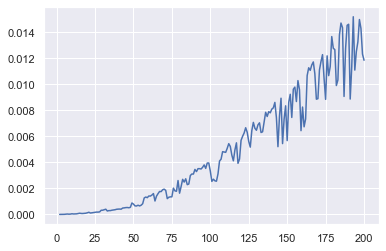

In [81]:
import numpy as np
#raw plot of average running times
plt.plot(list(range(2,maxN+1)),avgTimes)

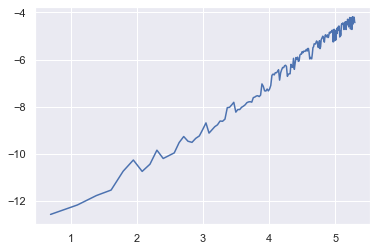

In [82]:
#log-log plot of running times. Roughly straight line of gradient k represents O(n^k) complexity
plt.plot(np.log(list(range(2,maxN+1))),np.log(avgTimes)) #gradient 2, so roughly O(n^2)

Analysis of the second plot roughly shows that the running time of the algorithm is O(n^2), as the gradient of the log-log plot is around 2. Due to the outer while loop running n times, and the inner loop running n times in the worst case, the running time of the algorithm should be of the order O(n^2).

In [90]:
#Task 9
import copy
random.seed(10)
#initialise variables
menScores = []
womenScores = []
n = 100 #number of men/women
m = 100 #sample size

#unique men and women
men = list(range(n))
women = [man + n for man in men] 

#for each sample, produce, solve, and score random problem
for i in range(m):
    pref1,pref2 = randomPrefTable(men,women)
    #stableMatching changes pref1, so this is needed for matchingScores
    originalPref1 = copy.deepcopy(pref1)
    matching = stableMatching(pref1,pref2)
    manScore,womanScore = matchingScores(originalPref1,pref2,matching)
    menScores.append(manScore)
    womenScores.append(womanScore)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


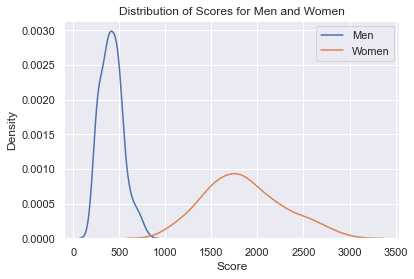

In [88]:
import seaborn as sb
sb.set_theme()
sb.kdeplot(menScores, label = "Men")
sb.kdeplot(womenScores, label = "Women")
plt.xlabel("Score")
plt.title("Distribution of Scores for Men and Women")
plt.legend()
plt.show()

The algorithm seems to have favoured the preferences of the men over the women, with the density of male scores (lower is better) concentrated closer to 0, with the distribution of womens scores far more spread out, with most density above 1000, where men have little to no density.

Task 10

Re-runnable: Essentially, this means the code should be as up to date as the language it is running on (or, at minimum, specify the version of Python for which it was last run successfully)

Repeatable: The program should run the same every time time for the same inputs. To ensure this, all degrees of randomness in the program must be controlled by setting a seed

Reproducible: The final results of a piece of code must be entirely reproducible when all other factors are controlled for. Therefore, alongsdie results, details such as seed used, timestamp, revision (version of code), and system information should all be included.

Reusability: We must ensure that the code is fully documented so that it can be easily used and altered by others (and by our future selves). Ensure that all quirks are accounted for in both documentation and comments

Replicable: Not only should the results be reproducible under the exact original conditions, but should be reproducible in different conditions by replicating the original environment. For example, rather than simply stating the Python version, we should fully describe the aspects of it that may change, such as the random number generator